In [4]:
## importing libraries

import networkx as nx
import networkit as nk
from sna_samplers import *
from scipy import stats
from typing import Union
import matplotlib.pyplot as plt
import random

In [5]:
## Defining functions to call multiple samplers

def PlotRandomEdgeSampler(graph,number_of_nodes = 100,number_of_edges = 100):
    sampler = RandomEdgeSampler(number_of_edges=number_of_edges)
    return sampler.sample(graph)

def PlotRandomNodeSampler(graph,number_of_nodes = 100):
    sampler = RandomNodeSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

def PlotRandomWalkSampler(graph,number_of_nodes = 100):
    sampler = RandomWalkSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

def PlotShortestPathSampler(graph,number_of_nodes = 100):
    sampler = ShortestPathSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

def PlotShortestPathModifiedSampler(graph,number_of_nodes = 100):
    sampler = ShortestPathModifiedSampler(number_of_nodes=number_of_nodes)
    return sampler.sample(graph)

In [9]:
## metrics to measure the difference between subgraph and actual graph

def RelativeError(graph, new_graph):
    acc = nx.average_clustering(graph)
    accn = nx.average_clustering(new_graph)
    return "Relative Error: " + str(abs(acc-accn)/acc)

def RootMeanSquare(graph, new_graph):
    cc = nx.clustering(graph)
    ccn = nx.clustering(new_graph)
    temp = 0
    for n in ccn.keys():
        temp += (cc[n] - ccn[n])**2
    temp = (temp/len(ccn))**(1/2)
    return "Root Mean Square Error: " + str(temp)

def KSTest(graph, new_graph):
    dd = nx.degree(graph)
    ddn = nx.degree(new_graph)
    ddl, ddln= [],[]
    for i in dd:
        ddl.append(i[1])
    for i in ddn:
        ddln.append(i[1])
    size = max(max(dd,key=lambda x:x[1]),max(dd,key=lambda x:x[1]))[1]
    temp = [0 for i in range(size+1)]
    tempn = [0 for i in range(size+1)]
    for i in range(size+1):
        temp[i] = ddl.count(i)
    for i in range(size+1):
        tempn[i] = ddln.count(i)
    return "KSTest: " + str(stats.kstest(temp,tempn).statistic)
    
    

In [10]:
## importing dataset

# reader = GraphReader("facebook")
# graph = reader.get_graph()
graph = nx.newman_watts_strogatz_graph(1000, 20, 0.05)

Relative Error: 0.9708101166431299
Root Mean Square Error: 0.6401844072061947
KSTest: 0.07692307692307693


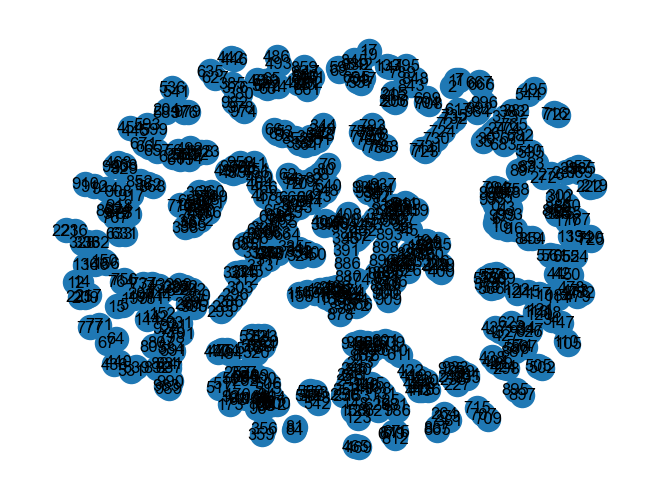

In [11]:
## Get metrics and sub graph for random edge sampler
new_graph = PlotRandomEdgeSampler(graph,number_of_edges=int(graph.number_of_edges()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

Relative Error: 0.6040492287994521
Root Mean Square Error: 0.5597689163871074
KSTest: 0.19230769230769232


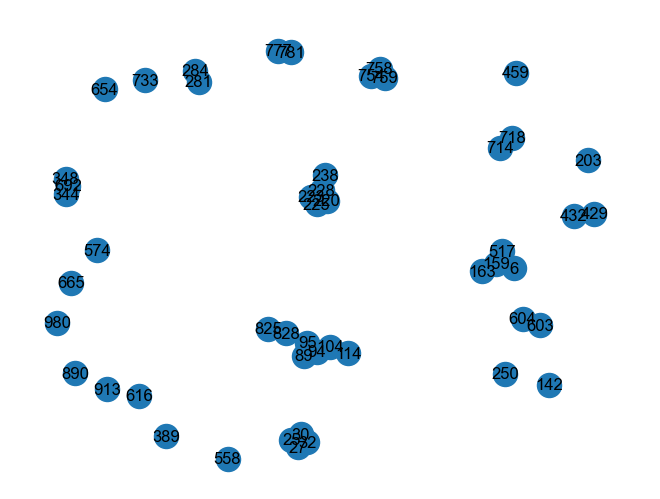

In [12]:
## Get metrics and sub graph for random node sampler

new_graph = PlotRandomNodeSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

Relative Error: 0.22343391042212474
Root Mean Square Error: 0.2034733503536443
KSTest: 0.3076923076923077


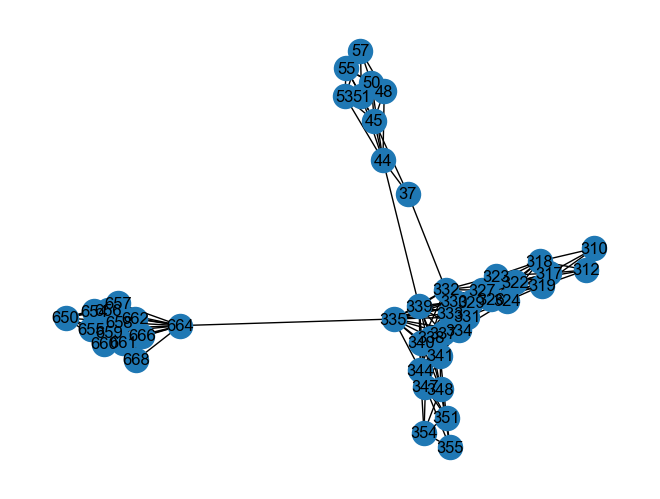

In [13]:
## Get metrics and sub graph for random walk sampler
new_graph = PlotRandomWalkSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

Relative Error: 0.4868066627816274
Root Mean Square Error: 0.464421120970177
KSTest: 0.19230769230769232


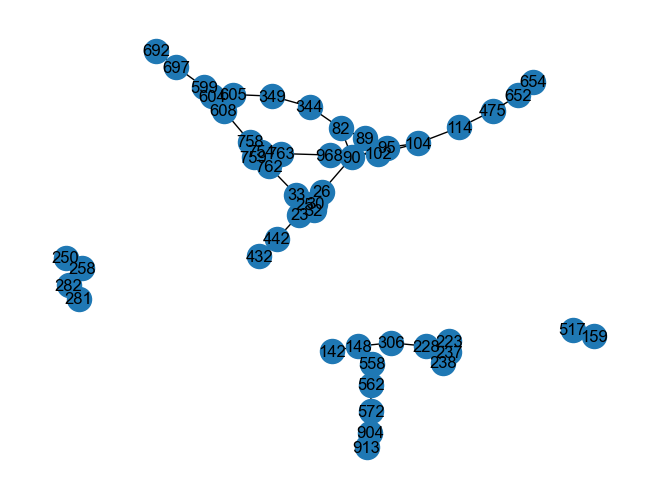

In [14]:
## Get metrics and sub graph for shortest path sampler
new_graph = PlotShortestPathSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()

Relative Error: 0.1301125536454973
Root Mean Square Error: 0.3272280149235504
KSTest: 0.19230769230769232


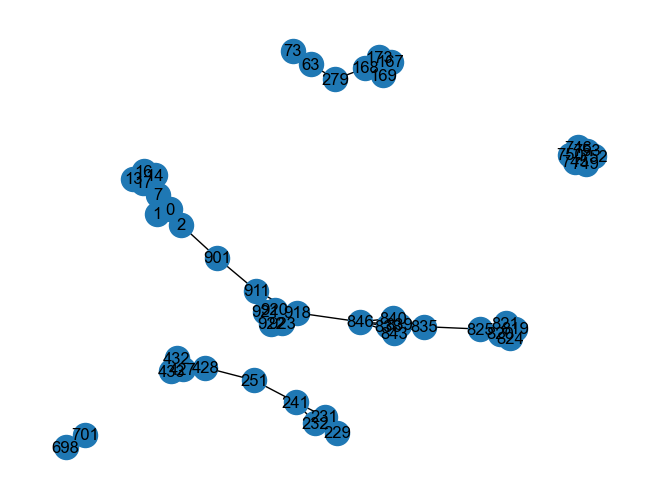

In [15]:
## Get metrics and sub graph for shortest path modified sampler
new_graph = PlotShortestPathModifiedSampler(graph,number_of_nodes=int(graph.number_of_nodes()*0.05))
print(RelativeError(graph,new_graph))
print(RootMeanSquare(graph,new_graph))
print(KSTest(graph,new_graph))
nx.draw(new_graph,with_labels=True)
plt.show()